## 05. 입회 및 탈회
- 입회일자_신용 / 입회경과개월수_신용 / 탈회횟수_누적 / 최종탈회후경과월 / 탈회횟수_발급6개월이내 / 탈회횟수_발급1년이내

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# Mac에서는 "AppleGothic" 사용
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [4]:
import pandas as pd

# 분석에 필요한 컬럼만 지정
usecols = ['입회일자_신용',
       '입회경과개월수_신용','탈회횟수_누적',
       '최종탈회후경과월', '탈회횟수_발급6개월이내', '탈회횟수_발급1년이내', 'Segment', 'ID']

# 필요한 컬럼만 불러오기
df = pd.read_csv("../data/train/1.회원정보/train_회원정보.csv", usecols=usecols)
df

,ID,Segment,입회일자_신용,입회경과개월수_신용,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급6개월이내,탈회횟수_발급1년이내
0,TRAIN_000000,D,20130101,67,1,61,0,0
1,TRAIN_000001,E,20170801,12,1,98,0,0
2,TRAIN_000002,C,20080401,124,1,60,0,0
3,TRAIN_000003,D,20160501,27,1,100,0,0
4,TRAIN_000004,E,20180601,2,1,101,0,0
...,...,...,...,...,...,...,...,...
2399995,TRAIN_399995,E,20010701,209,0,0,0,0
2399996,TRAIN_399996,D,20170701,17,1,50,0,0
2399997,TRAIN_399997,C,20090501,115,0,0,0,0
2399998,TRAIN_399998,E,20130101,71,0,0,0,0


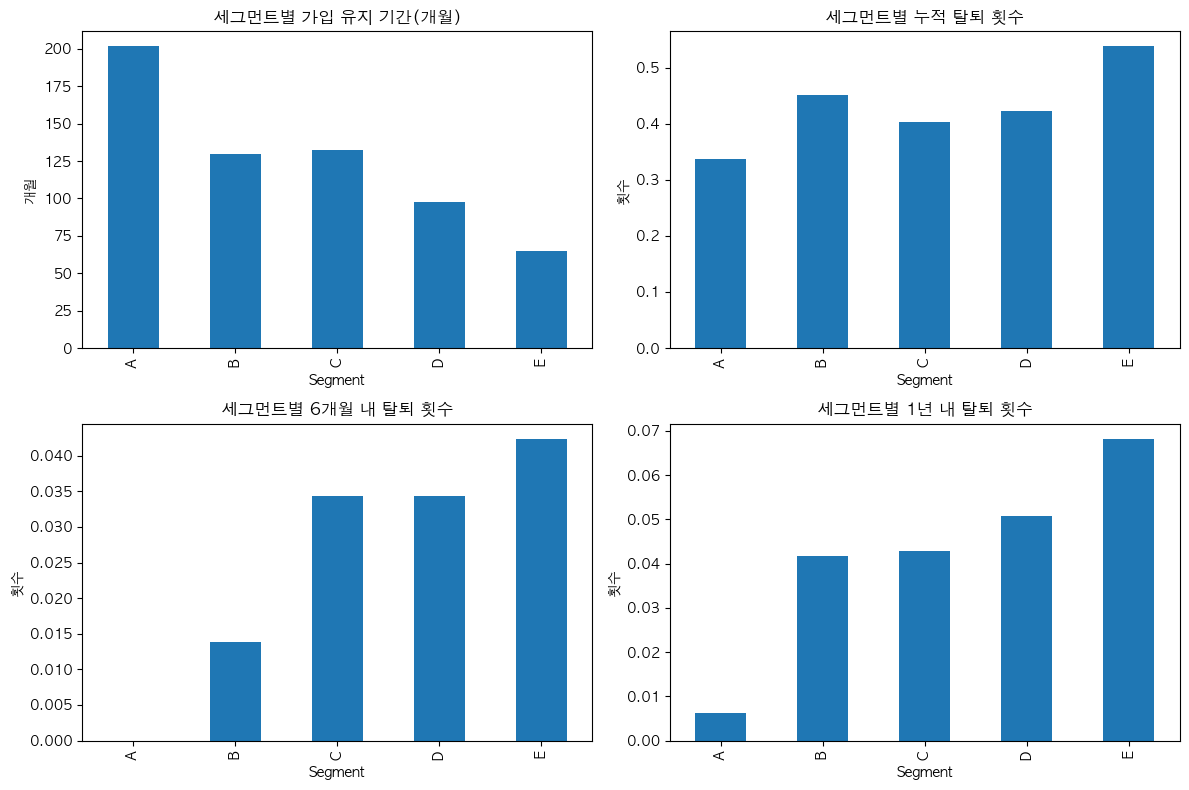

In [10]:
# 1. 세그먼트별 가입 지속 개월 평균
mean_duration = df.groupby("Segment")["입회경과개월수_신용"].mean()

# 2. 세그먼트별 탈퇴 관련 평균
mean_withdraw_total = df.groupby("Segment")["탈회횟수_누적"].mean()
mean_within_6m = df.groupby("Segment")["탈회횟수_발급6개월이내"].mean()
mean_within_1y = df.groupby("Segment")["탈회횟수_발급1년이내"].mean()

# 3. 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

mean_duration.plot(kind="bar", ax=axes[0, 0], title="세그먼트별 가입 유지 기간(개월)", ylabel="개월")
mean_withdraw_total.plot(kind="bar", ax=axes[0, 1], title="세그먼트별 누적 탈퇴 횟수", ylabel="횟수")
mean_within_6m.plot(kind="bar", ax=axes[1, 0], title="세그먼트별 6개월 내 탈퇴 횟수", ylabel="횟수")
mean_within_1y.plot(kind="bar", ax=axes[1, 1], title="세그먼트별 1년 내 탈퇴 횟수", ylabel="횟수")

plt.tight_layout()
plt.show()

In [15]:
# 예시 코드
total_per_segment = df["Segment"].value_counts().sort_index()  # 각 세그먼트별 총 인원수
churn_per_segment = df[df["탈회횟수_누적"] > 0]["Segment"].value_counts().sort_index()  # 탈퇴 경험 있는 인원수

# 탈퇴율 계산
churn_rate = (churn_per_segment / total_per_segment * 100).fillna(0).round(2)
print(churn_rate)

Segment
A    30.56
B    41.67
C    35.39
D    36.41
E    42.85
Name: count, dtype: float64


In [17]:
# 예시 코드
total_per_segment = df["Segment"].value_counts().sort_index()  # 각 세그먼트별 총 인원수
churn_per_segment = df[df["탈회횟수_발급6개월이내"] > 0]["Segment"].value_counts().sort_index()  # 탈퇴 경험 있는 인원수

# 탈퇴율 계산
churn_rate = (churn_per_segment / total_per_segment * 100).fillna(0).round(2)
print(churn_rate)

Segment
A    0.00
B    1.39
C    3.44
D    3.43
E    4.24
Name: count, dtype: float64


In [19]:
# 예시 코드
total_per_segment = df["Segment"].value_counts().sort_index()  # 각 세그먼트별 총 인원수
churn_per_segment = df[df["탈회횟수_발급1년이내"] > 0]["Segment"].value_counts().sort_index()  # 탈퇴 경험 있는 인원수

# 탈퇴율 계산
churn_rate = (churn_per_segment / total_per_segment * 100).fillna(0).round(2)
print(churn_rate)

Segment
A    0.62
B    4.17
C    4.28
D    5.07
E    6.82
Name: count, dtype: float64


- A: 가입 유지도 오래하고, 탈퇴도 적은 장기보유 충성고객